In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("book.csv",engine="python")

In [4]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,f,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
df.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [8]:
df.shape

(10000, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


Rename the column name into proper name conventation

In [5]:
df.rename({"User.ID":"User_id"},axis=1,inplace=True)

In [6]:
df.rename({"Book.Title":"Book_title"},axis=1,inplace=True)

In [7]:
df.rename({"Book.Rating":"Book_rating"},axis=1,inplace=True)

In [8]:
df.head()

,Unnamed: 0,User_id,Book_title,Book_rating
0,1,276726,Classical Mythology,5
1,2,276729,f,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [9]:
data = df.iloc[:,1:].copy()

In [10]:
data.head()

,User_id,Book_title,Book_rating
0,276726,Classical Mythology,5
1,276729,f,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [11]:
data.nunique()

User_id        2182
Book_title     9659
Book_rating      10
dtype: int64

Average Rating is 7.58

In [12]:
data["Book_rating"].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_rating, dtype: int64

In [25]:
# Check the no. of rows
data["Book_rating"].shape[0]

10000

<AxesSubplot:xlabel='Book_rating', ylabel='count'>

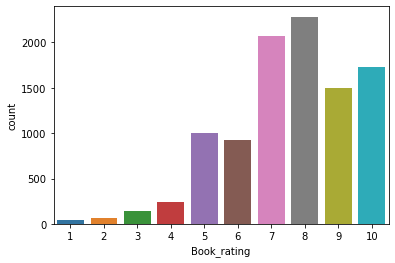

In [26]:
sns.countplot(x="Book_rating",data=data)

Distribution is uneven

In [27]:
data.head()

,User_id,Book_title,Book_rating
0,276726,Classical Mythology,5
1,276729,f,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [28]:
# Check dublicate rows
data[data.duplicated() == True]

,User_id,Book_title,Book_rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [29]:
# drop the duplicated rows
data.drop_duplicates(["Book_rating"],inplace=True,keep="last")

In [30]:
data.reset_index(drop=True,inplace=True)

# Recommand pairwise

In [ ]:
# Create pivot table into order to see how many rating did particular user on each book
user_book_df = data.pivot(index='User_id',
                                 columns='Book_title',
                                 values='Book_rating').reset_index(drop=True)

In [23]:
user_book_df.head()

Book_title,Cannibal In Manhattan,How to Flirt: A Practical Guide,Kids Say the Darndest Things,Leaving Home,Open Water,The Concrete Enema: And Other News of the Weird Classics,The End Of The Dream The Golden Boy Who Never Grew Up : Ann Rules Crime Files Volume 5,The Flower in the Skull,The Millstone,Twilight
0,NaN,NaN,NaN,1.0,NaN,2.0,3.0,NaN,4.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
2,9.0,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,8.0
3,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
user_book_df.shape

(4, 10)

In [25]:
user_book_df.index = data.User_id.unique()

In [26]:
user_book_df.head()

Book_title,Cannibal In Manhattan,How to Flirt: A Practical Guide,Kids Say the Darndest Things,Leaving Home,Open Water,The Concrete Enema: And Other News of the Weird Classics,The End Of The Dream The Golden Boy Who Never Grew Up : Ann Rules Crime Files Volume 5,The Flower in the Skull,The Millstone,Twilight
162052,NaN,NaN,NaN,1.0,NaN,2.0,3.0,NaN,4.0,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
162121,9.0,7.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,8.0
162129,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Impute those NaNs with 0 values
user_book_df.fillna(0, inplace=True)

In [28]:
user_book_df.head()

Book_title,Cannibal In Manhattan,How to Flirt: A Practical Guide,Kids Say the Darndest Things,Leaving Home,Open Water,The Concrete Enema: And Other News of the Weird Classics,The End Of The Dream The Golden Boy Who Never Grew Up : Ann Rules Crime Files Volume 5,The Flower in the Skull,The Millstone,Twilight
162052,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,4.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
162121,9.0,7.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,8.0
162129,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [30]:
user_similar = 1 - pairwise_distances( user_book_df.values,metric='cosine')

In [31]:
user_similar

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [32]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_similar,index=data.User_id.unique(),columns=data.User_id.unique())

In [33]:
user_sim_df

,162052,162109,162121,162129
162052,1.0,0.0,0.0,0.0
162109,0.0,1.0,0.0,0.0
162121,0.0,0.0,1.0,0.0
162129,0.0,0.0,0.0,1.0


In [34]:
np.fill_diagonal(user_similar, 0)
user_sim_df

,162052,162109,162121,162129
162052,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0
162129,0.0,0.0,0.0,0.0


In [35]:
#Most Similar Users
user_sim_df.idxmax(axis=1)

162052    162052
162109    162052
162121    162052
162129    162052
dtype: int64

In [36]:
data[(data['User_id']==162121) | (data['User_id']==162052)]

,User_id,Book_title,Book_rating
0,162052,The End Of The Dream The Golden Boy Who Never ...,3
1,162052,The Concrete Enema: And Other News of the Weir...,2
2,162052,Leaving Home,1
3,162052,The Millstone,4
5,162121,Open Water,5
6,162121,Cannibal In Manhattan,9
7,162121,How to Flirt: A Practical Guide,7
8,162121,Twilight,8


Choose two books

In [37]:
User_one = data[data['User_id']== 162121]#userId row choose open water book 
User_two = data[data['User_id']== 162052]#userId col choose The End Of The Dream The Golden Boy Who Never book

In [38]:
User_one.Book_title

5                         Open Water
6              Cannibal In Manhattan
7    How to Flirt: A Practical Guide
8                           Twilight
Name: Book_title, dtype: object

Inferences

This is the recommanded Books after choosing book by User one has userId (162121) open water

In [39]:
User_two.Book_title

0    The End Of The Dream The Golden Boy Who Never ...
1    The Concrete Enema: And Other News of the Weir...
2                                         Leaving Home
3                                        The Millstone
Name: Book_title, dtype: object

Inferences

This is the recommanded Books after choosing book by User_two has userId (16205).The End Of The Dream The Golden Boy Who Never Book

In [40]:
Users_recommand = pd.merge(User_one,User_two,on="Book_title",how="outer")

In [41]:
Users_recommand.columns = ["User_one_id","Book_title","User_one_rating","User_two_id","User_two_ratings"]

In [42]:
Users_recommand

,User_one_id,Book_title,User_one_rating,User_two_id,User_two_ratings
0,162121.0,Open Water,5.0,NaN,NaN
1,162121.0,Cannibal In Manhattan,9.0,NaN,NaN
2,162121.0,How to Flirt: A Practical Guide,7.0,NaN,NaN
3,162121.0,Twilight,8.0,NaN,NaN
4,NaN,The End Of The Dream The Golden Boy Who Never ...,NaN,162052.0,3.0
5,NaN,The Concrete Enema: And Other News of the Weir...,NaN,162052.0,2.0
6,NaN,Leaving Home,NaN,162052.0,1.0
7,NaN,The Millstone,NaN,162052.0,4.0


Inferences

As we can see User_one got matched Books and also User_two got 

# Recommendations based on rating counts

In [47]:
rating_count = pd.DataFrame(clean_df.groupby("Book_title")["Book_rating"].count())
rating_count.sort_values('Book_rating',ascending=False).head()

,Book_rating
Book_title,
Fahrenheit 451,5
Enders Game (Ender Wiggins Saga (Paperback)),4
Stardust,4
Vanished,4
Charlie and the Chocolate Factory,4


As we can see most ratings count are 5

The book with “Fahrenheit 451” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [52]:
most_rated_books = pd.DataFrame(['Fahrenheit 451', 'Enders Game (Ender Wiggins Saga (Paperback))', 'Stardust', 'Vanished', 'Charlie and the Chocolate Factory'], index=np.arange(5), columns = ['Book_title'])
most_rated_books_summary = pd.merge(most_rated_books, ratings, on='Book_title')
most_rated_books_summary

,Book_title,Book_rating,N_rating
0,Fahrenheit 451,7.00,5
1,Enders Game (Ender Wiggins Saga (Paperback)),6.25,4
2,Stardust,8.50,4
3,Vanished,6.50,4
4,Charlie and the Chocolate Factory,6.50,4


Inferences

The book we recieved have most rating counts in this dataset is Fahrenheit 451 .There is somethings common among these five books that received most rating counts .Maximum books among five are novel books

# Recommand Using KNN

. For more efficient calculation and less memory footprint, we need to transform the values of the dataframe into a scipy sparse matrix.

In [16]:
combine_book_rating = clean_df.copy()

In [17]:
combine_book_rating.head()

,User_id,Book_title,Book_rating
0,276726,Classical Mythology,5
1,276729,f,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


We then group by book titles and create a new column for total rating count.

In [18]:
from scipy.sparse import csr_matrix

In [19]:
combine_book_rating [combine_book_rating.duplicated()]

,User_id,Book_title,Book_rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [31]:
combine_book_rating.shape

(10, 3)

In [20]:
combine_book_rating.drop_duplicates(["Book_rating"],inplace=True)

In [21]:
# Create pivot table to see ratings based on Users
user_rating_pivot = combine_book_rating.pivot(index = 'Book_title', columns = 'User_id', values = 'Book_rating').fillna(0)

In [27]:
user_rating_pivot.head()

User_id,276726,276729,276736,276744,276745,276747,276762,276853,276875
Book_title,,,,,,,,,
A Kiss Remembered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Classical Mythology,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
user_rating_pivot.shape

(10, 9)

In [43]:
type(user_rating_pivot)

pandas.core.frame.DataFrame

In [ ]:
# convert dataframe of movie features to scipy sparse matrix

In [28]:
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute',n_neighbors=5, n_jobs=1)
model_knn.fit(user_rating_matrix )

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=1)

In [69]:
query_index = np.random.choice(user_rating_pivot.shape[0])

In [70]:
query_index

1

Test our model and make some recommendations:

In this step, the kNN algorithm measures distance to determine the “closeness” of instances. It then classifies an instance by finding its nearest neighbors, and picks the most popular class among the neighbors.

In [72]:
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[1, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Classical Mythology:

1: PLEADING GUILTY, with distance of 1.0:
2: Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It, with distance of 1.0:
3: What If?: The World's Foremost Military Historians Imagine What Might Have Been, with distance of 1.0:
4: The Kitchen God's Wife, with distance of 1.0:
5: A Kiss Remembered, with distance of 1.0:
